In [46]:
import pandas as pd
import analysis_functs as funct
import numpy as np
import yfinance as yf

start_date = "2023-11-16" # hard coded dates for analysis
end_date = "2024-11-16"

portf = pd.read_csv("simple_portf.csv")



In [47]:
portf

,TICKER,QUANTITY
0,JPM,10
1,GOOG,10
2,AMZN,10
3,STLA,10


In [48]:
retdf = pd.DataFrame()

In [49]:
for tickers in portf.iloc[:,0]: # get price data for each stock in the original portf dataframe and also their normalized returns
    retdf[tickers] = (yf.download(tickers, start=start_date, end=end_date, interval="5d")['Adj Close'])
    retdf[tickers + " Normalized Return"] = retdf[tickers]/retdf.iloc[0][tickers]

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
og_alloc = []
for ticker in portf.iloc[:,0]:
    og_alloc.append(retdf.iloc[0][ticker])

In [51]:
portf["ORIGINAL_VALUE"] = portf["QUANTITY"]*og_alloc
portf

,TICKER,QUANTITY,ORIGINAL_VALUE
0,JPM,10,1479.178009
1,GOOG,10,1382.034149
2,AMZN,10,1428.300018
3,STLA,10,186.430168


In [52]:
portf["ALLOCATION"] = portf["ORIGINAL_VALUE"]/sum(portf["ORIGINAL_VALUE"])
portf

,TICKER,QUANTITY,ORIGINAL_VALUE,ALLOCATION
0,JPM,10,1479.178009,0.330473
1,GOOG,10,1382.034149,0.308769
2,AMZN,10,1428.300018,0.319106
3,STLA,10,186.430168,0.041652


In [53]:
sum(portf["ORIGINAL_VALUE"])

4475.942344665527

In [54]:
retdf.head()

,JPM,JPM Normalized Return,GOOG,GOOG Normalized Return,AMZN,AMZN Normalized Return,STLA,STLA Normalized Return
Date,,,,,,,,
2023-11-16,147.917801,1.000000,138.203415,1.000000,142.830002,1.000000,18.643017,1.000000
2023-11-21,149.402359,1.010036,138.123703,0.999423,143.899994,1.007491,18.886351,1.013052
2023-12-01,153.182114,1.035589,132.842697,0.961211,147.029999,1.029406,20.599037,1.104920
2023-12-06,152.664474,1.032090,130.959427,0.947585,144.520004,1.011832,21.095060,1.131526
2023-12-11,155.389404,1.050512,134.217743,0.971161,145.889999,1.021424,21.095060,1.131526


In [55]:
retdf.iloc[0]

JPM                       147.917801
JPM Normalized Return       1.000000
GOOG                      138.203415
GOOG Normalized Return      1.000000
AMZN                      142.830002
AMZN Normalized Return      1.000000
STLA                       18.643017
STLA Normalized Return      1.000000
Name: 2023-11-16 00:00:00, dtype: float64

In [56]:
for ticker in portf.iloc[:,0]:
    retdf.iloc[0][ticker]

In [57]:
og_alloc = []
for ticker in portf.iloc[:,0]:
    og_alloc.append(retdf.iloc[0][ticker])

In [58]:
retdf.head()

,JPM,JPM Normalized Return,GOOG,GOOG Normalized Return,AMZN,AMZN Normalized Return,STLA,STLA Normalized Return
Date,,,,,,,,
2023-11-16,147.917801,1.000000,138.203415,1.000000,142.830002,1.000000,18.643017,1.000000
2023-11-21,149.402359,1.010036,138.123703,0.999423,143.899994,1.007491,18.886351,1.013052
2023-12-01,153.182114,1.035589,132.842697,0.961211,147.029999,1.029406,20.599037,1.104920
2023-12-06,152.664474,1.032090,130.959427,0.947585,144.520004,1.011832,21.095060,1.131526
2023-12-11,155.389404,1.050512,134.217743,0.971161,145.889999,1.021424,21.095060,1.131526


In [59]:
for tickers in portf.iloc[:,0]:
    retdf.insert(retdf.columns.get_loc(tickers)+2,tickers+ " Pos Value", retdf[tickers+" Normalized Return"]*portf.iloc[np.where(portf == "JPM")[0][0]]["ORIGINAL_VALUE"])

In [60]:
retdf.head()

,JPM,JPM Normalized Return,JPM Pos Value,GOOG,GOOG Normalized Return,GOOG Pos Value,AMZN,AMZN Normalized Return,AMZN Pos Value,STLA,STLA Normalized Return,STLA Pos Value
Date,,,,,,,,,,,,
2023-11-16,147.917801,1.000000,1479.178009,138.203415,1.000000,1479.178009,142.830002,1.000000,1479.178009,18.643017,1.000000,1479.178009
2023-11-21,149.402359,1.010036,1494.023590,138.123703,0.999423,1478.324860,143.899994,1.007491,1490.259075,18.886351,1.013052,1498.484650
2023-12-01,153.182114,1.035589,1531.821136,132.842697,0.961211,1421.802756,147.029999,1.029406,1522.674075,20.599037,1.104920,1634.372971
2023-12-06,152.664474,1.032090,1526.644745,130.959427,0.947585,1401.646294,144.520004,1.011832,1496.680035,21.095060,1.131526,1673.728543
2023-12-11,155.389404,1.050512,1553.894043,134.217743,0.971161,1436.519741,145.889999,1.021424,1510.867997,21.095060,1.131526,1673.728543


In [44]:
retdf.head()

,JPM,JPM Normalized Return,JPM Pos Value,GOOG,GOOG Normalized Return,GOOG Pos Value,AMZN,AMZN Normalized Return,AMZN Pos Value,STLA,STLA Normalized Return,STLA Pos Value
Date,,,,,,,,,,,,
2023-11-16,147.917801,1.000000,1479.178009,138.203415,1.000000,1479.178009,142.830002,1.000000,1479.178009,18.643017,1.000000,1479.178009
2023-11-21,149.402359,1.010036,1494.023590,138.123703,0.999423,1478.324860,143.899994,1.007491,1490.259075,18.886351,1.013052,1498.484650
2023-12-01,153.182114,1.035589,1531.821136,132.842697,0.961211,1421.802756,147.029999,1.029406,1522.674075,20.599037,1.104920,1634.372971
2023-12-06,152.664474,1.032090,1526.644745,130.959427,0.947585,1401.646294,144.520004,1.011832,1496.680035,21.095060,1.131526,1673.728543
2023-12-11,155.389404,1.050512,1553.894043,134.217743,0.971161,1436.519741,145.889999,1.021424,1510.867997,21.095060,1.131526,1673.728543


In [43]:
portf_val = pd.DataFrame()
for ticker in portf.iloc[:,0]:
  
    portf_val[ticker + " Position Value"] = retdf[ticker + " Pos Value"]
    print(portf_val[ticker + " Position Value"].head(1))
    print(retdf[ticker + " Pos Value"].head(1))
# portf_val["Total"] = portf_val.sum(axis=1)

Date
2023-11-16    1479.178009
Name: JPM Position Value, dtype: float64
Date
2023-11-16    1479.178009
Name: JPM Pos Value, dtype: float64
Date
2023-11-16    1479.178009
Name: GOOG Position Value, dtype: float64
Date
2023-11-16    1479.178009
Name: GOOG Pos Value, dtype: float64
Date
2023-11-16    1479.178009
Name: AMZN Position Value, dtype: float64
Date
2023-11-16    1479.178009
Name: AMZN Pos Value, dtype: float64
Date
2023-11-16    1479.178009
Name: STLA Position Value, dtype: float64
Date
2023-11-16    1479.178009
Name: STLA Pos Value, dtype: float64


In [37]:
portf_val.head()

,JPM Pos Value,GOOG Pos Value,AMZN Pos Value,STLA Pos Value
Date,,,,
2023-11-16,1479.178009,1479.178009,1479.178009,1479.178009
2023-11-21,1494.023590,1478.324860,1490.259075,1498.484650
2023-12-01,1531.821136,1421.802756,1522.674075,1634.372971
2023-12-06,1526.644745,1401.646294,1496.680035,1673.728543
2023-12-11,1553.894043,1436.519741,1510.867997,1673.728543


<Axes: xlabel='Date'>

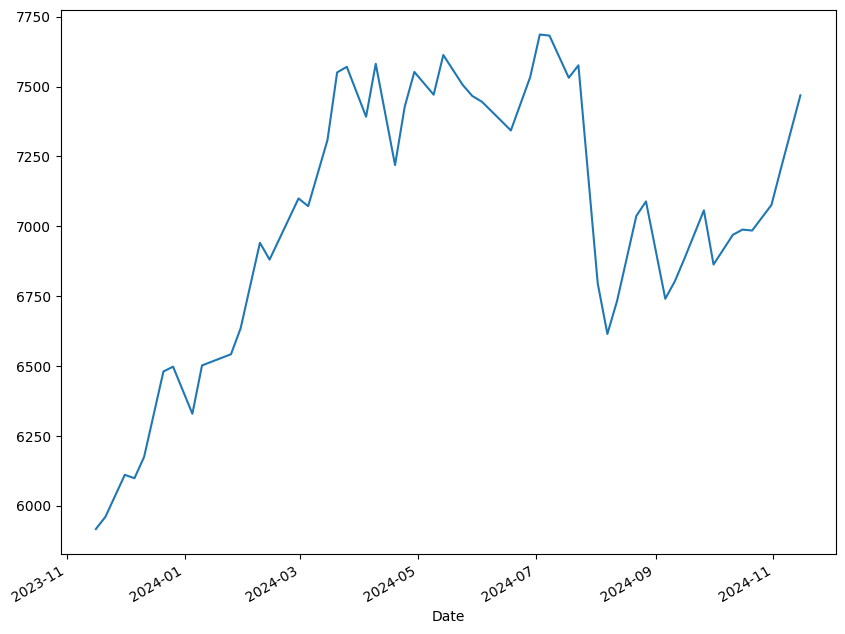

In [20]:
# plot the portfolio!!
import matplotlib.pyplot as plt
%matplotlib inline
portf_val["Total"].plot(figsize=(10,8))

<Axes: xlabel='Date'>

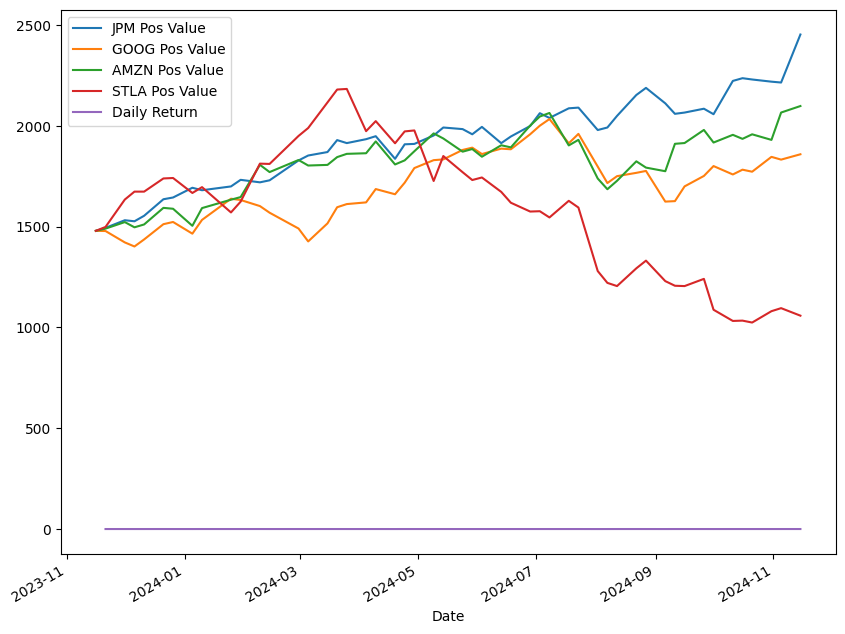

In [ ]:
portf_val.drop('Total', axis = 1).plot(figsize=(10,8))

In [22]:
portf_val["Daily Return"] = portf_val["Total"].pct_change(1)

In [23]:
portf_val.head()

,JPM Pos Value,GOOG Pos Value,AMZN Pos Value,STLA Pos Value,Total,Daily Return
Date,,,,,,
2023-11-16,1479.178009,1479.178009,1479.178009,1479.178009,5916.712036,NaN
2023-11-21,1494.023590,1478.324860,1490.259075,1498.484650,5961.092175,0.007501
2023-12-01,1531.821136,1421.802756,1522.674075,1634.372971,6110.670939,0.025093
2023-12-06,1526.644745,1401.646294,1496.680035,1673.728543,6098.699617,-0.001959
2023-12-11,1553.894043,1436.519741,1510.867997,1673.728543,6175.010324,0.012513


In [24]:
sharpe = portf_val["Daily Return"].mean()/portf_val["Daily Return"].std() # assumes risk free rate of 0%

In [26]:
sharpe = (252**.5)*sharpe

In [27]:
sharpe

2.954073252173293